# 根据all_tweets产生的数据结果进行分析

In [39]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime

sns.set(style="darkgrid", font_scale=1.5)
# sns.set_palette("coolwarm", 8)
ira_c = sns.color_palette("coolwarm", 10)[8]
all_c = sns.color_palette("coolwarm", 10)[1]

In [2]:
print("loading all tweets_csv ...")
%time all_tweets = pd.read_csv("disk/all-tweets-v2.csv", dtype=str)
# all_tweets = all_tweets.astype(
#     {"is_IRA": int, "is_source": int, "dt": datetime})
all_tweets = all_tweets.astype({"is_IRA": int, "is_source": int})
print("finished!")

loading all tweets_csv ...
CPU times: user 1min 3s, sys: 4.6 s, total: 1min 8s
Wall time: 1min 13s
finished!


In [3]:
all_tweets = all_tweets[all_tweets.c_alex!="-1"]
len(all_tweets)

35675331

In [115]:
len(all_tweets[all_tweets.is_source==1])

11066617

In [8]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]
len(ira_tweets)

25568

In [117]:
fake_tweets = all_tweets[all_tweets.c_alex=="fake"]

In [118]:
print(len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==0)]))

print(len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==0)]))

689 2195
1704254 2945736


In [4]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

In [96]:
sns.set_style("darkgrid")
sns.set_palette("coolwarm_r", n_colors=8)

tweets = all_tweets[all_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = tweets["c_alex"].value_counts()
display(media_type_counts)

left leaning            8518070
center                  6938350
left                    4738758
fake                    4652874
right                   4553689
extreme bias (right)    4459235
right leaning           1169747
extreme bias (left)      644608
Name: c_alex, dtype: int64

In [98]:
tweets["c_alex"].value_counts(normalize=True)

left leaning            0.238766
center                  0.194486
left                    0.132830
fake                    0.130423
right                   0.127643
extreme bias (right)    0.124995
right leaning           0.032789
extreme bias (left)     0.018069
Name: c_alex, dtype: float64

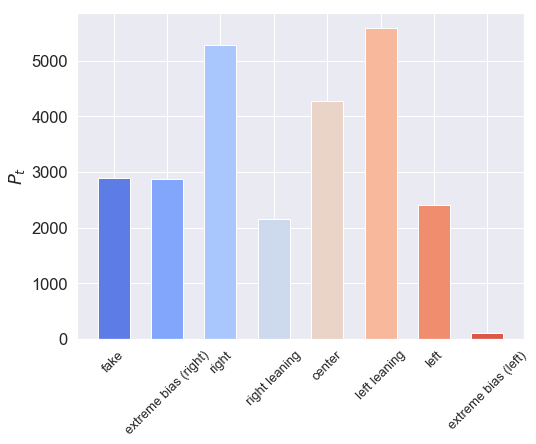

In [185]:
plt.figure(figsize=(8, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel("$P_t$")
plt.xticks(rotation=45, fontsize=13)
# plt.yticks(fontsize=14)

plt.savefig("fig/Pt-all.pdf", dpi=300, bbox_inches='tight')

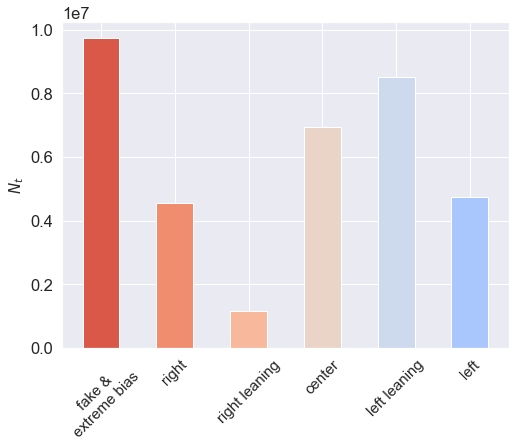

In [95]:
plt.figure(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Nt-all.pdf", dpi=300, bbox_inches='tight')

In [99]:
tweets = ira_tweets[ira_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = tweets["c_alex"].value_counts()
display(media_type_counts)

left leaning            5578
right                   5273
center                  4274
fake                    2884
extreme bias (right)    2882
left                    2403
right leaning           2164
extreme bias (left)      110
Name: c_alex, dtype: int64

In [100]:
tweets["c_alex"].value_counts(normalize=True)

left leaning            0.218163
right                   0.206234
center                  0.167162
fake                    0.112797
extreme bias (right)    0.112719
left                    0.093985
right leaning           0.084637
extreme bias (left)     0.004302
Name: c_alex, dtype: float64

In [101]:
0.206234 + 0.084637

0.290871

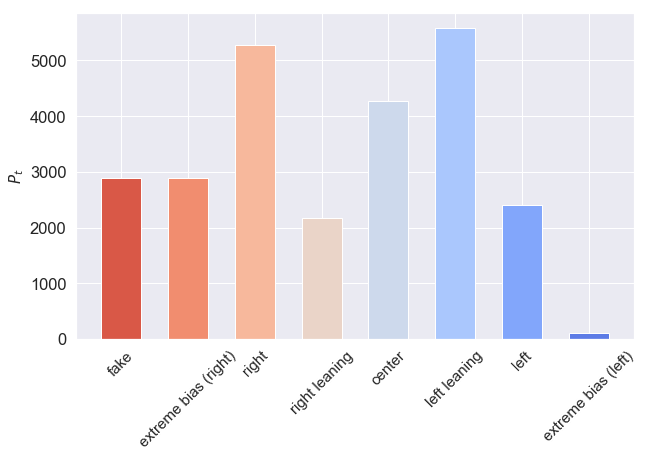

In [87]:
plt.figure(figsize=(10, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$P_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Pt-ira.pdf", dpi=300, bbox_inches='tight')

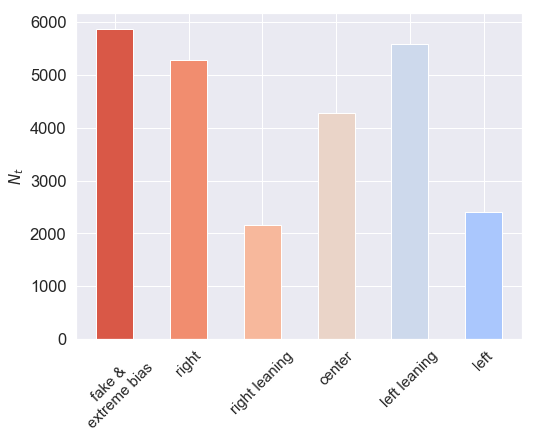

In [90]:
plt.figure(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/NT-ira.pdf", dpi=300, bbox_inches='tight')

## IRA作为源，或者参与到其中的消息是否更加爆炸？

In [15]:
ira_as_source = ira_tweets[ira_tweets.is_source == 1]

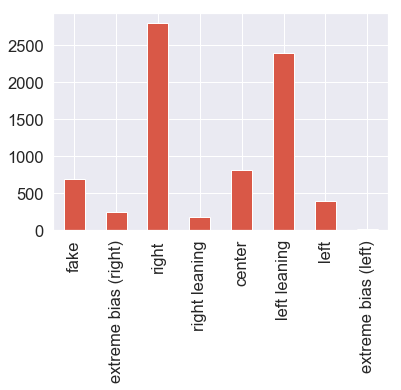

In [16]:
pd.Series(ira_as_source.c_alex.value_counts(), index=[labels[i] for i in range(len(labels))]).plot("bar")

IRA作为源的新闻，被转发多少次

In [15]:
tweets_count = all_tweets.groupby("retweeted_id").count().tweet_id

In [17]:
len(ira_as_source)

7544

In [ ]:
import sys, traceback

media_len_ret = Counter()

for _, row in tqdm(ira_as_source.iterrows()):
    try:
        tweet_id = row["tweet_id"]
        c = int(tweets_count[tweets_count.index==tweet_id].values)
    except:
        c = 0
        # traceback.print_exc()
        
    media_len_ret[row.c_alex] += c

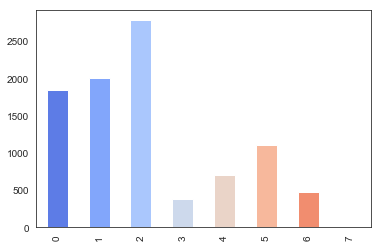

In [17]:
pd.Series(dict_media_len_ret, index=[str(i) for i in range(8)]).plot("bar")

In [18]:
URL_count = all_tweets.URL.value_counts()

7345it [00:01, 7173.16it/s]


0    351.173469
1    944.808525
2    588.846596
3    572.043689
4    237.193947
5    544.730479
6    235.702247
7    107.436170
dtype: float64

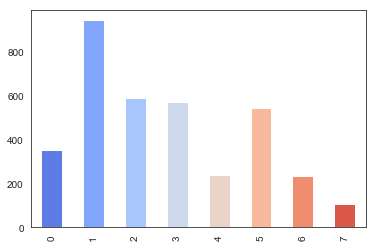

0     412980
1    1440833
2     717804
3     117841
4     384017
5     432516
6     167820
7      10099
dtype: int64

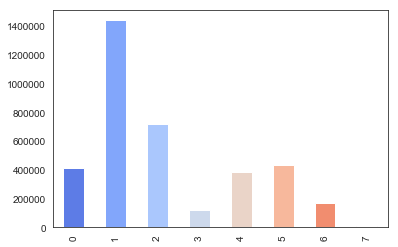

In [19]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    c = int(URL_count[row.URL])
    dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

7345it [00:00, 13289.07it/s]


0    216.328990
1    924.779412
2    374.208145
3    250.130435
4    483.034188
5     97.679104
6    253.585366
7    109.384615
dtype: float64

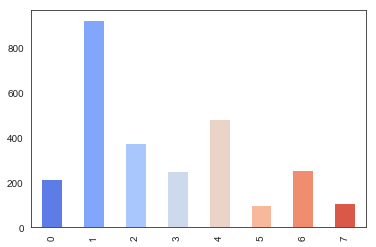

0     66413
1    125770
2     82700
3      5753
4     56515
5     26178
6     20794
7      1422
dtype: int64

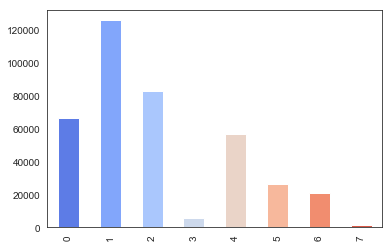

In [20]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    if row.is_source == 1:
        c = int(URL_count[row.URL])
        dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

为了作为对比，所有的URL又是什么情况呢？

# Loading all-users.csv ... ...

!! Already coded in the all_tweets.py for making all-users.csv

In [40]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

In [230]:
# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
all_users = pd.read_csv("data/all-users-v2.csv", index_col="user_id", dtype={"user_id": str})
print(len(all_users))
# change the type
# f_labels = [map_labels[k] for k in map_labels]
all_users = all_users.astype({"is_IRA": int})

for label in labels:
    # print(label)
    all_users = all_users.astype({label: int,
                                  label + "_source": int,
                                  label + "_source_rate": float})

2481142


## Are IRAs the sources of fake news or influencers? 

分析IRA到底在选举期间的作用

In [13]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

498

In [188]:
IRA_users.to_csv("data/IRA-users-20190419.csv")

In [14]:
IRA_users.fake.describe()

count    498.000000
mean       5.791165
std       32.037273
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      409.000000
Name: fake, dtype: float64

In [15]:
IRA_u = IRA_users[labels]

In [14]:
IRA_u = IRA_u[IRA_u._sum > 0]
len(IRA_u)

348

In [15]:
IRA_u.loc[:, "fake+right"] = IRA_u["fake"] + IRA_u["extreme bias (right)"] + IRA_u["right"] + \
    IRA_u["right leaning"] + IRA_u["extreme bias (left)"]

In [16]:
IRA_u.loc[:, "center+left"] = IRA_u["center"] + IRA_u["left leaning"]

In [17]:
IRA_u.loc[:, "fake+extreme"] = IRA_u["fake"] + IRA_u["extreme bias (right)"]

In [18]:
IRA_u.loc[:, "fake/left"] = np.log((IRA_u["center+left"] + 1)) - np.log((IRA_u["fake+extreme"] + 1))

In [19]:
IRA_u.sort_values("fake+extreme", ascending=False)[:25]

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left),_sum,fake+right,center+left,fake+extreme,fake/left
user_id,,,,,,,,,,,,,
1679279490,396,424,379,87,180,177,67,8,1718.0,1294,357,820,-0.829990
1671234620,323,345,242,42,103,74,16,2,1147.0,954,177,668,-1.324001
789266125485998080,409,0,0,0,178,0,0,0,587.0,409,178,409,-0.828771
1662779209,138,251,232,37,41,37,5,0,741.0,658,78,389,-1.596699
2606301939,125,199,163,22,35,33,4,1,582.0,510,68,324,-1.549719
1661246144,109,178,197,32,44,31,5,1,597.0,517,75,287,-1.332227
1629828379,71,110,96,18,27,23,3,0,348.0,295,50,181,-1.272181
2535166748,73,72,53,12,37,27,12,0,286.0,210,64,145,-0.809219
2491081213,69,69,71,8,19,25,6,0,267.0,217,44,138,-1.127811


In [20]:
IRA_u.sort_values("center+left", ascending=False)[:25]

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left),_sum,fake+right,center+left,fake+extreme,fake/left
user_id,,,,,,,,,,,,,
2752677905,0,0,0,0,0,680,0,0,680.0,0,680,0,6.523562
2624554209,0,0,0,0,0,670,0,0,670.0,0,670,0,6.508769
2743327187,0,0,0,98,0,386,1,0,485.0,98,386,0,5.958425
1679279490,396,424,379,87,180,177,67,8,1718.0,1294,357,820,-0.829990
789266125485998080,409,0,0,0,178,0,0,0,587.0,409,178,409,-0.828771
1671234620,323,345,242,42,103,74,16,2,1147.0,954,177,668,-1.324001
3899481526,9,0,118,16,90,66,9,0,308.0,143,156,9,2.753661
2577082467,0,0,0,0,35,117,0,0,152.0,0,152,0,5.030438
1652987412,0,4,5,7,72,73,40,9,210.0,25,145,4,3.374169


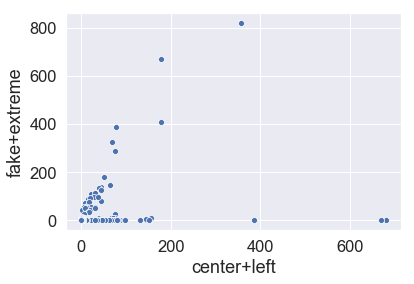

In [21]:
sns.scatterplot(x="center+left", y="fake+extreme", data=IRA_u)
# plt.title("Number of IRA's tweets corresponding to media categories")
# plt.xscale("log")
# plt.yscale("log")

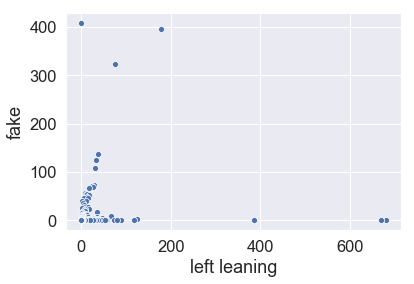

In [22]:
sns.scatterplot(x="left leaning", y="fake", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

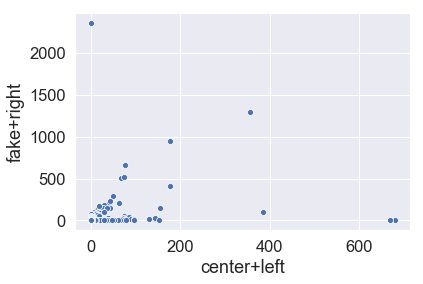

In [23]:
sns.scatterplot(x="center+left", y="fake+right", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

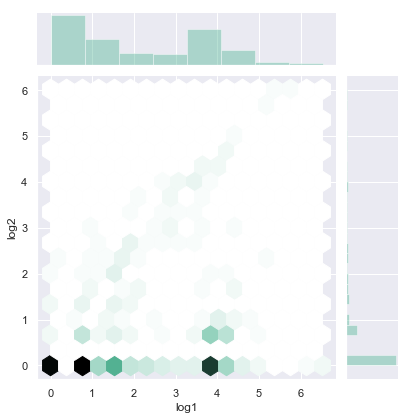

In [26]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

IRA_u['log1'] = np.log(IRA_u["center+left"] + 1)
IRA_u['log2'] = np.log(IRA_u["fake"] + 1)
sns.jointplot(x="log1", y="log2", data=IRA_u, kind="hex", color="#4CB391")

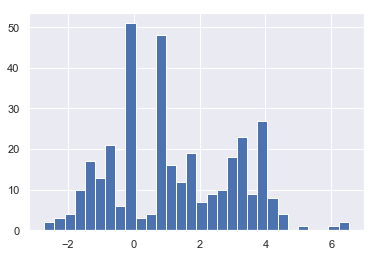

In [27]:
IRA_u["fake/left"].hist(bins=30)

In [186]:
def get_big_table(_users):
    big_table = []

    for lab in labels:
        volume = int(_users[lab].sum()) # 某种媒体上总和
        source_volume = int(_users[lab + "_source"].sum())
#         first_volume = _users[lab + "_first"].sum()
        source_rate = _users[_users[lab + "_source_rate"] > 0][lab + "_source_rate"].mean()
#         first_rate = _users[_users[lab + "_first_rate"] > 0][lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
        
#         d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
#                  Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)

        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume, Rs=source_rate, Nsu=source_user_volume)
        big_table.append(d)
    
    big_table = pd.DataFrame(big_table, index=labels)
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
#     big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

    big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
    
    big_table = big_table.round(2)
#     big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table


def plot_compare(col_name):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
    print(BT[col_name])
    print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRA users")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="All users")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
    if col_name == "Pt":
        plt.ylabel("$P_{t}$")
#         plt.ylim(0, 0.5)
    col_name = col_name.replace("/", "-")
    plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
def plot_compare_comm(BT, BT2, col_name, cNum):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="All users")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="IRA users")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
    if col_name == "Pt":
        plt.ylabel("$P_{t}$")
        plt.ylim(0, 0.4) 
    col_name = col_name.replace("/", "-")
    plt.savefig(f"fig/c{cNum}-{col_name}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
def plot_col(BT, col_name):    
    x = range(6)

    print(labels)
    for i in x:
        if i == 0:
            plt.bar(i, BT[col_name][labels[0]] + BT[col_name][labels[1]] + BT[col_name][labels[7]],
                    width=0.5)
        else:
            plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

    new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
    plt.xticks(x, new_labels)
    # plt.xlabel("IRAs", fontsize=18)
    plt.ylabel('$P_{t}$', fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    # plt.yticks(fontsize=14)


#     plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     BT[col_name].plot.bar(width=0.3)
#     plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    # plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [187]:
BT2 = get_big_table(all_users)
BT2.to_csv("data/all_BT.csv")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,4652874,0.13,1704943,0.37,0.15,290131,16.04,114813,14.85
extreme bias (right),4459235,0.12,1270035,0.28,0.11,309226,14.42,106350,11.94
right,4553689,0.13,1230771,0.27,0.11,445995,10.21,149353,8.24
right leaning,1169747,0.03,391250,0.33,0.04,303690,3.85,94319,4.15
center,6938350,0.19,2151380,0.31,0.19,1116700,6.21,290324,7.41
left leaning,8518070,0.24,2496675,0.29,0.23,1383299,6.16,425077,5.87
left,4738758,0.13,1638315,0.35,0.15,711835,6.66,244109,6.71
extreme bias (left),644608,0.02,183248,0.28,0.02,103718,6.22,37662,4.87


In [188]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv")
BT

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2884,0.11,689,0.24,0.09,132,21.85,59,11.68
extreme bias (right),2882,0.11,246,0.09,0.03,123,23.43,47,5.23
right,5273,0.21,2797,0.53,0.37,172,30.66,70,39.96
right leaning,2164,0.08,183,0.08,0.02,182,11.89,37,4.95
center,4274,0.17,821,0.19,0.11,254,16.83,92,8.92
left leaning,5578,0.22,2400,0.43,0.32,244,22.86,72,33.33
left,2403,0.09,394,0.16,0.05,206,11.67,60,6.57
extreme bias (left),110,0.00,14,0.13,0.00,44,2.50,11,1.27


fake                    0.11
extreme bias (right)    0.11
right                   0.21
right leaning           0.08
center                  0.17
left leaning            0.22
left                    0.09
extreme bias (left)     0.00
Name: Pt, dtype: float64
fake                    0.13
extreme bias (right)    0.12
right                   0.13
right leaning           0.03
center                  0.19
left leaning            0.24
left                    0.13
extreme bias (left)     0.02
Name: Pt, dtype: float64


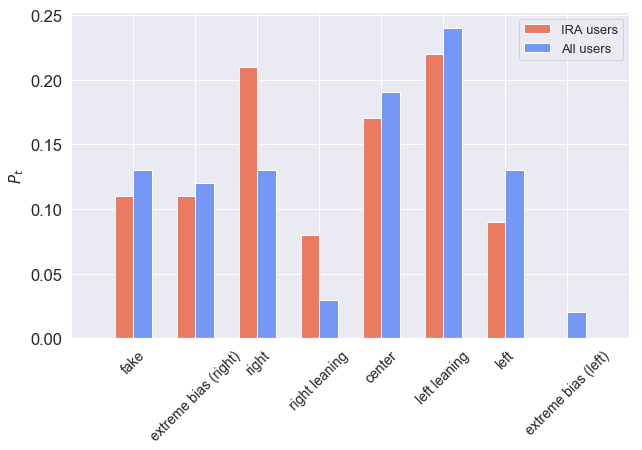

In [189]:
plot_compare("Pt")

fake                    0.09
extreme bias (right)    0.03
right                   0.37
right leaning           0.02
center                  0.11
left leaning            0.32
left                    0.05
extreme bias (left)     0.00
Name: Ps, dtype: float64
fake                    0.15
extreme bias (right)    0.11
right                   0.11
right leaning           0.04
center                  0.19
left leaning            0.23
left                    0.15
extreme bias (left)     0.02
Name: Ps, dtype: float64


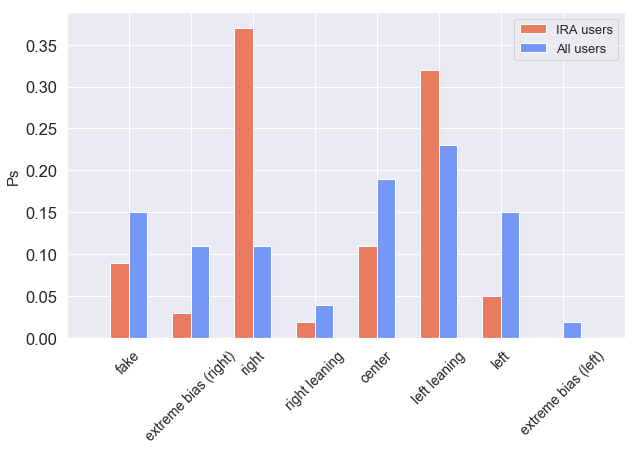

In [190]:
plot_compare("Ps")

## 四个重要的社团，看看是否有针对性？

results from interaction_with_ira.ipynb

In [191]:
comm = json.load(open("data/louvain_rst.json"))
# comm = json.load(open("data/ira-ret-community.json"))

In [196]:
def plot_community(cNum):
    # get users
    if cNum == -1:
        users_comm = [k for k in comm]
    else:
        users_comm = [k for k in comm if comm[k] == cNum]
    all_users_comm = all_users.reindex(users_comm)
    
    _BT = get_big_table(all_users_comm)
    _BT.to_csv(f"data/all_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT)
    # plot_col(_BT, "Pt")
    
    ira_comm = all_users_comm[all_users_comm.is_IRA>0]
    print(len(all_users_comm), len(ira_comm))
    
    _BT2 = get_big_table(ira_comm)
    _BT2.to_csv(f"data/IRA_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT2)
    # plot_col(_BT2, "Pt")
    
    plot_compare_comm(_BT, _BT2, "Pt", cNum)
    plot_col(_BT, "Pt")

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3630028,0.22,1019969,0.28,0.24,92787,39.12,40770,25.02
extreme bias (right),3660568,0.22,890703,0.24,0.21,94269,38.83,39505,22.55
right,3327511,0.20,718724,0.22,0.17,101153,32.90,42576,16.88
right leaning,594310,0.04,139584,0.23,0.03,75152,7.91,23134,6.03
center,2215893,0.13,508152,0.23,0.12,102897,21.54,37486,13.56
left leaning,2101366,0.12,552282,0.26,0.13,100693,20.87,37871,14.58
left,1143523,0.07,403384,0.35,0.09,67837,16.86,24147,16.71
extreme bias (left),182488,0.01,59221,0.32,0.01,14449,12.63,5039,11.75


179682 453


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2884,0.12,689,0.24,0.14,132,21.85,59,11.68
extreme bias (right),2882,0.12,246,0.09,0.05,123,23.43,47,5.23
right,2864,0.12,388,0.14,0.08,168,17.05,66,5.88
right leaning,2162,0.09,182,0.08,0.04,180,12.01,36,5.06
center,4261,0.18,809,0.19,0.16,250,17.04,89,9.09
left leaning,5575,0.24,2398,0.43,0.47,241,23.13,70,34.26
left,2362,0.10,353,0.15,0.07,204,11.58,58,6.09
extreme bias (left),110,0.00,14,0.13,0.00,44,2.50,11,1.27


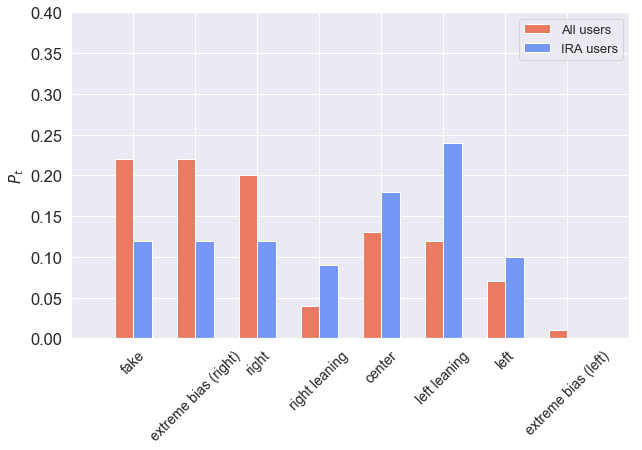

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


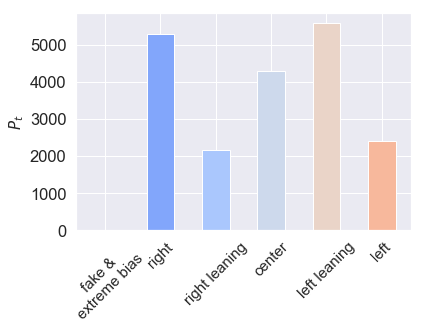

In [197]:
plot_community(-1)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3546655,0.24,984696,0.28,0.29,88959,39.87,38952,25.28
extreme bias (right),3574694,0.24,851722,0.24,0.25,90525,39.49,37752,22.56
right,3216653,0.22,664882,0.21,0.19,95474,33.69,39817,16.70
right leaning,544238,0.04,114652,0.21,0.03,69591,7.82,20618,5.56
center,1789599,0.12,302892,0.17,0.09,90648,19.74,31759,9.54
left leaning,1513254,0.10,307027,0.20,0.09,86848,17.42,30711,10.00
left,656884,0.04,172410,0.26,0.05,56666,11.59,18277,9.43
extreme bias (left),90587,0.01,21842,0.24,0.01,10516,8.61,3382,6.46


137938 123


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2776,0.21,672,0.24,0.15,73,38.03,45,14.93
extreme bias (right),2795,0.21,239,0.09,0.05,69,40.51,40,5.98
right,2621,0.20,359,0.14,0.08,82,31.96,49,7.33
right leaning,579,0.04,168,0.29,0.04,55,10.53,29,5.79
center,1537,0.11,730,0.47,0.17,91,16.89,60,12.17
left leaning,2757,0.21,2102,0.76,0.48,81,34.04,44,47.77
left,286,0.02,83,0.29,0.02,50,5.72,23,3.61
extreme bias (left),16,0.00,2,0.12,0.00,8,2.00,2,1.00


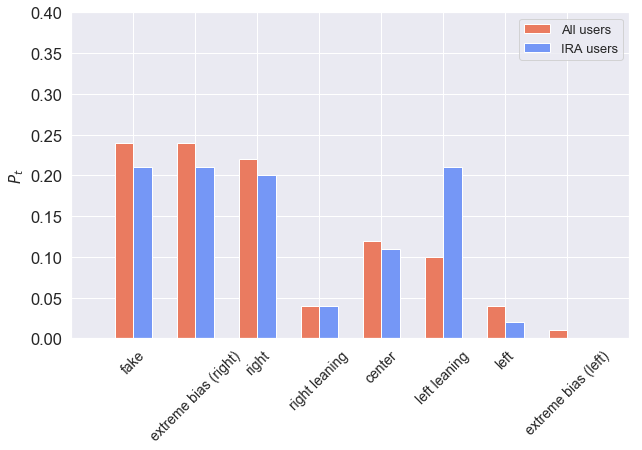

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


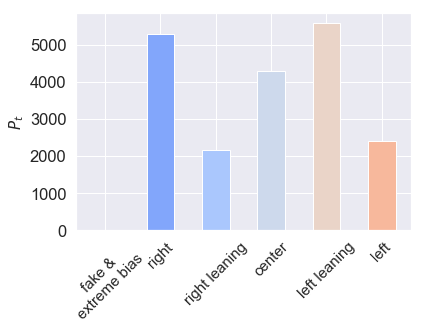

In [193]:
plot_community(0)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,63805,0.04,29476,0.46,0.04,2946,21.66,1418,20.79
extreme bias (right),64167,0.04,31455,0.49,0.04,2917,22.00,1350,23.30
right,90699,0.05,48765,0.54,0.06,4536,20.00,2201,22.16
right leaning,43794,0.03,22329,0.51,0.03,4607,9.51,2101,10.63
center,391072,0.23,196375,0.50,0.24,10160,38.49,4773,41.14
left leaning,535050,0.31,227816,0.43,0.28,11518,46.45,6024,37.82
left,451076,0.26,219629,0.49,0.27,9436,47.80,4990,44.01
extreme bias (left),84888,0.05,35396,0.42,0.04,3341,25.41,1436,24.65


31955 220


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,90,0.01,17,0.19,0.02,48,1.88,14,1.21
extreme bias (right),79,0.01,5,0.06,0.01,47,1.68,5,1.00
right,226,0.02,28,0.12,0.04,71,3.18,16,1.75
right leaning,1551,0.16,14,0.01,0.02,96,16.16,7,2.00
center,2658,0.28,78,0.03,0.11,122,21.79,28,2.79
left leaning,2763,0.29,293,0.11,0.41,126,21.93,23,12.74
left,2016,0.21,268,0.13,0.37,115,17.53,33,8.12
extreme bias (left),92,0.01,12,0.13,0.02,34,2.71,9,1.33


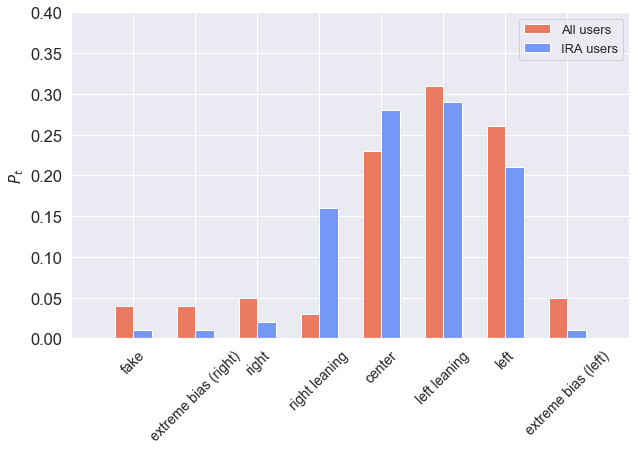

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


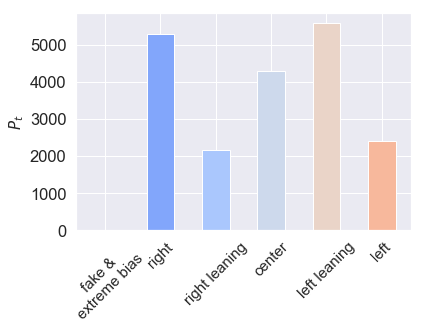

In [194]:
plot_community(1)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,19554,0.10,5793,0.30,0.10,881,22.20,399,14.52
extreme bias (right),21704,0.11,7525,0.35,0.12,825,26.31,402,18.72
right,20145,0.10,5076,0.25,0.08,1139,17.69,557,9.11
right leaning,6154,0.03,2502,0.41,0.04,937,6.57,406,6.16
center,35099,0.18,8789,0.25,0.15,2073,16.93,942,9.33
left leaning,52819,0.27,17247,0.33,0.29,2309,22.88,1124,15.34
left,35532,0.18,11331,0.32,0.19,1719,20.67,873,12.98
extreme bias (left),7013,0.04,1983,0.28,0.03,592,11.85,221,8.97


9586 82


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,18,0.07,0,0.00,0.00,11,1.64,0,NaN
extreme bias (right),8,0.03,2,0.25,0.22,7,1.14,2,1.0
right,17,0.07,1,0.06,0.11,15,1.13,1,1.0
right leaning,23,0.09,0,0.00,0.00,21,1.10,0,NaN
center,66,0.27,1,0.02,0.11,37,1.78,1,1.0
left leaning,55,0.22,3,0.05,0.33,34,1.62,3,1.0
left,57,0.23,2,0.04,0.22,36,1.58,2,1.0
extreme bias (left),2,0.01,0,0.00,0.00,2,1.00,0,NaN


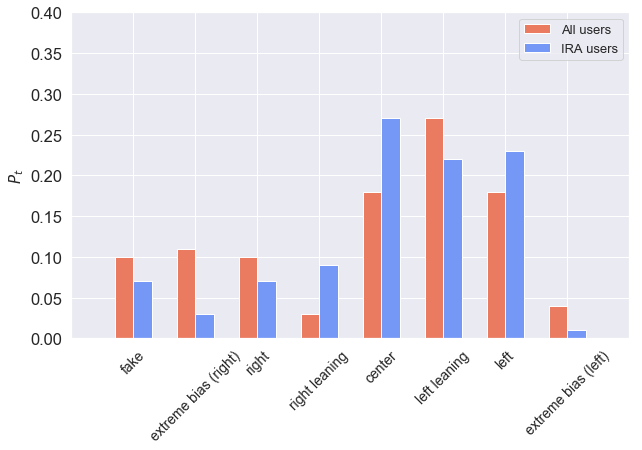

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


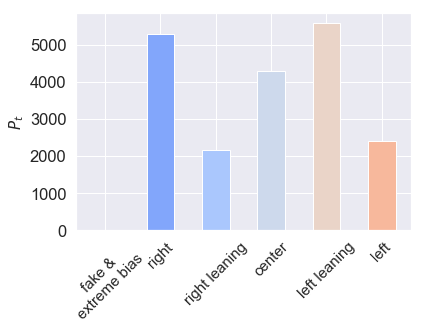

In [195]:
plot_community(4)

In [205]:
for lab in labels:
    d = IRA_users.sort_values(lab + "_source", ascending=False)
    d = d[[lab, lab + "_source"]].head(25)
    # display(d)
    d.to_csv(f"data/IRA_{lab}_originators_top25.csv")

In [206]:
for lab in labels:
    IRA_users.loc[:, lab + "_retweet"] = IRA_users[lab] - IRA_users[lab + "_source"]
    d = IRA_users.sort_values(lab + "_retweet", ascending=False)
    d = d[[lab, lab + "_retweet"]].head(25)
    # display(d)
    d.to_csv(f"data/IRA_{lab}_retweeters_top25.csv")

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

## 说了这么多left的东西？究竟在说什么？

In [46]:
left_tweetids = set()

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    if d["c_mbfc"] == "left leaning":
        left_tweetids.add(d["tweetid"])

In [86]:
ira_data = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid", "tweet_text"], dtype=str)

In [93]:
cnt = 0
w_cnt = Counter()
with open("data/ira-left-text.txt", "w") as f:
    for i, row in tqdm(ira_data.iterrows()):
        if row["tweetid"] in left_tweetids and not row["tweet_text"].startswith("RT"):
            f.write(row["tweet_text"] + "\n")

In [153]:
BT2 = get_big_table(all_users)
BT2.to_csv("data/all_BT.csv", float_format="%.2f")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,4652874,0.130423,1704943,0.366428,0.154062,290131,16.037149,114813,14.849738
extreme bias (right),4459235,0.124995,1270035,0.284810,0.114763,309226,14.420634,106350,11.942031
right,4553689,0.127643,1230771,0.270280,0.111215,445995,10.210179,149353,8.240685
right leaning,1169747,0.032789,391250,0.334474,0.035354,303690,3.851780,94319,4.148157
center,6938350,0.194486,2151380,0.310071,0.194403,1116700,6.213262,290324,7.410273
left leaning,8518070,0.238766,2496675,0.293103,0.225604,1383299,6.157794,425077,5.873465
left,4738758,0.132830,1638315,0.345727,0.148041,711835,6.657102,244109,6.711408
extreme bias (left),644608,0.018069,183248,0.284278,0.016559,103718,6.215006,37662,4.865594


fake                    0.112797
extreme bias (right)    0.112719
right                   0.206234
right leaning           0.084637
center                  0.167162
left leaning            0.218163
left                    0.093985
extreme bias (left)     0.004302
Name: Pt, dtype: float64
fake                    0.130423
extreme bias (right)    0.124995
right                   0.127643
right leaning           0.032789
center                  0.194486
left leaning            0.238766
left                    0.132830
extreme bias (left)     0.018069
Name: Pt, dtype: float64


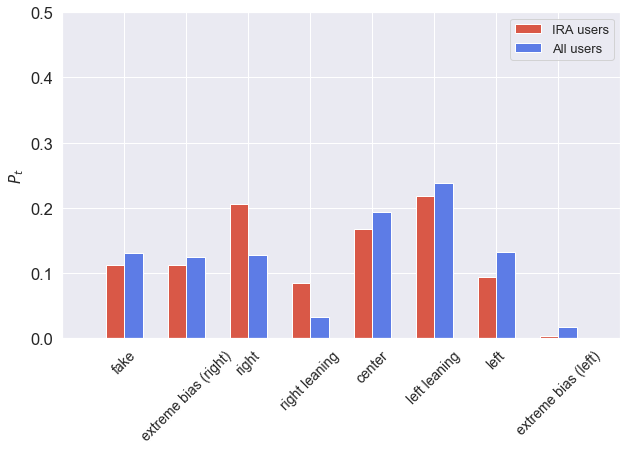

In [180]:
plot_compare("Pt")

fake                    0.044528
extreme bias (right)    0.057956
right                   0.072486
right leaning           0.049133
center                  0.160523
left leaning            0.317599
left                    0.248973
extreme bias (left)     0.048802
Name: Ps, dtype: float64
fake                    0.154062
extreme bias (right)    0.114763
right                   0.111215
right leaning           0.035354
center                  0.194403
left leaning            0.225604
left                    0.148041
extreme bias (left)     0.016559
Name: Ps, dtype: float64


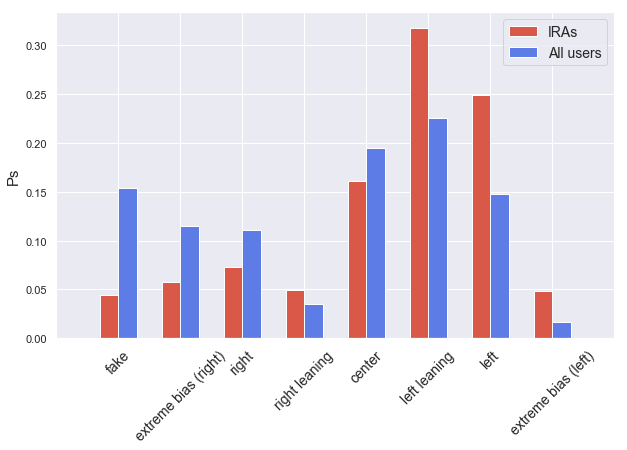

In [63]:
plot_compare("Ps")

fake                    0.323907
extreme bias (right)    0.375022
right                   0.337701
right leaning           0.472303
center                  0.224710
left leaning            0.280425
left                    0.294079
extreme bias (left)     0.272938
Name: Ns/Nt, dtype: float64
fake                    0.366428
extreme bias (right)    0.284810
right                   0.270280
right leaning           0.334474
center                  0.310071
left leaning            0.293103
left                    0.345727
extreme bias (left)     0.284278
Name: Ns/Nt, dtype: float64


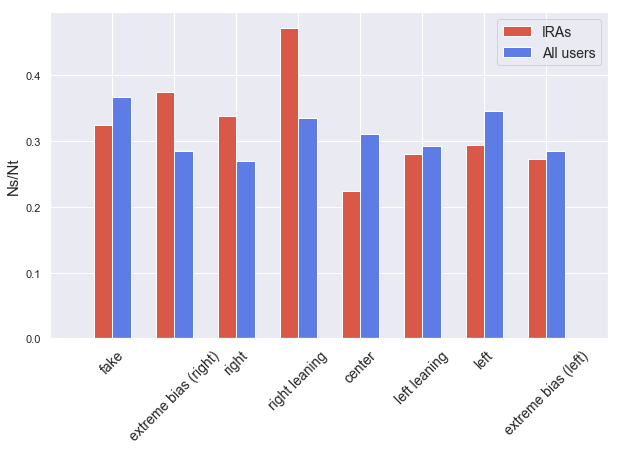

In [64]:
plot_compare("Ns/Nt")
# (BT["Rs"] / BT2["Rs"]).plot.bar()

fake                     7.163793
extreme bias (right)     8.689922
right                    8.379978
right leaning            5.030667
center                  14.856078
left leaning            20.946966
left                    21.132829
extreme bias (left)     12.592233
Name: Nt/Nu, dtype: float64
fake                    16.037149
extreme bias (right)    14.420634
right                   10.210179
right leaning            3.851780
center                   6.213262
left leaning             6.157794
left                     6.657102
extreme bias (left)      6.215006
Name: Nt/Nu, dtype: float64


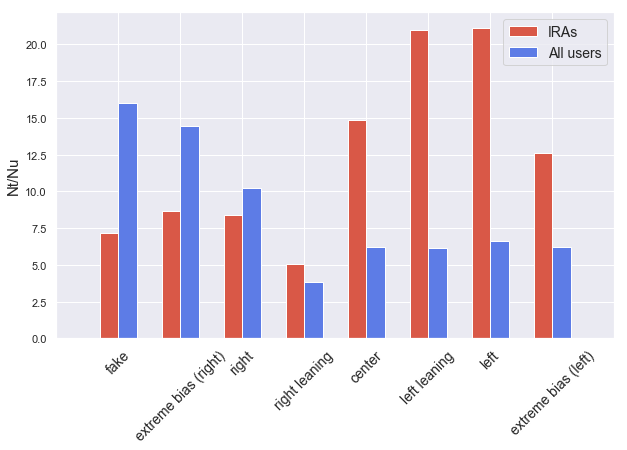

In [65]:
plot_compare("Nt/Nu")

fake                     5.706714
extreme bias (right)     7.643636
right                    6.229858
right leaning            5.959866
center                   7.773031
left leaning            12.630482
left                    12.506925
extreme bias (left)      9.465241
Name: Ns/Nsu, dtype: float64
fake                    14.849738
extreme bias (right)    11.942031
right                    8.240685
right leaning            4.148157
center                   7.410273
left leaning             5.873465
left                     6.711408
extreme bias (left)      4.865594
Name: Ns/Nsu, dtype: float64


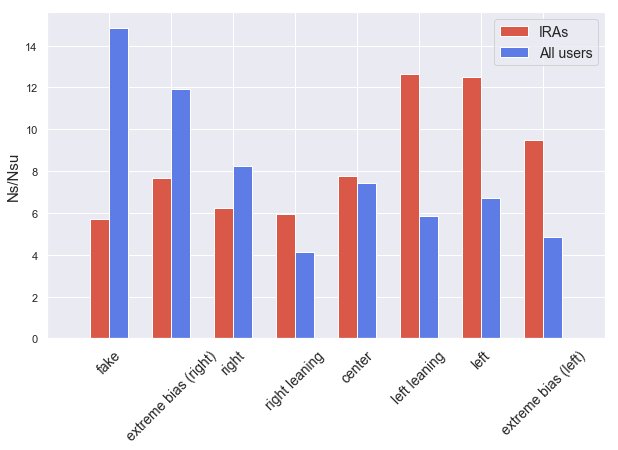

In [66]:
plot_compare("Ns/Nsu")

## IRAs as sources

1. 看看每个用户发布的量
2. 找到top sources看看交集

结论：IRA从量上来看伪装非常普通的用户！

用户发帖量的分布 或 用户发source tweets的分布

fake


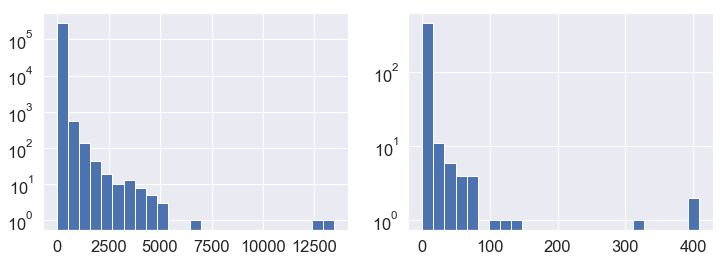

extreme bias (right)
right
right leaning
center
left leaning
left
extreme bias (left)


In [54]:
sns.set_style("darkgrid")

for lab in labels:
    print(lab)
    
    plt.figure(figsize=(12, 4))
    
    ax = plt.subplot(121)
    _users = all_users[all_users[lab] > 0]
    _users[lab].hist(ax=ax, bins=25)
    # USER_TABLE[lab] = _users[lab].describe()
    
    plt.yscale("log")
    # plt.xscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab].hist(ax=ax, bins=25)
    # IRA_USER_TABLE[lab] = IRA_users[lab].describe()
    
    plt.yscale("log")
    
    if lab == "fake":
        plt.show()
    plt.close()

### 从量的角度看IRA的确不高，甚至低于一般的用户

In [55]:
set_IRAs_users = set()

for user_id, row in IRA_users.iterrows():
    set_IRAs_users.add(user_id)
    
# print(len(set_IRAs_users))

In [35]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 3
extreme bias (right) 5
right 6
right leaning 28
center 2
left leaning 3
left 0
extreme bias (left) 0


In [37]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab + "_source"].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 2
extreme bias (right) 1
right 4
right leaning 2
center 3
left leaning 7
left 1
extreme bias (left) 0


## IRA as influencers

分析IRA是不是影响力比较大的节点

In [6]:
# 方向 both undir out in

import graph_tool.all as gt

def build_CI_rank(graph_file):
    rst = {}
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i for i, d in enumerate(st_user_CI)}
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank
    
#     user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
#     rst["undir_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["undir_id"] = st_user_CI
    
#     user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
#     rst["both_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["both_id"] = st_user_CI

    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i for i, d in enumerate(st_user_CI)}
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank
    
    return rst

In [7]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

In [2]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
users = pd.read_csv("data/all-users-v2.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))

498


In [226]:
IRA_user_list = []
for u in IRA_users.index:
    if u in reversed_ira_map:
        IRA_user_list.append(reversed_ira_map[u])
    else:
        IRA_user_list.append(u)

json.dump(IRA_user_list, open("bingo_IRA_users.json", "w"))

In [220]:
ira_map = json.load(open("data/IRA_map.json"))

In [223]:
reversed_ira_map = {v: k for k, v in ira_map.items() if len(k) == 64}

fake_out                      151/243728
fake_in                         9/243728
extreme bias (right)_out      249/267483
extreme bias (right)_in         4/267483
right_out                     195/381293
right_in                        5/381293
right leaning_out             394/254265
right leaning_in                2/254265
center_out                    559/974603
center_in                     110/974603
left leaning_out            1091/1182127
left leaning_in              662/1182127
left_out                     1889/586271
left_in                      1153/586271
extreme bias (left)_out       3757/83660
extreme bias (left)_in        6268/83660
dtype: object

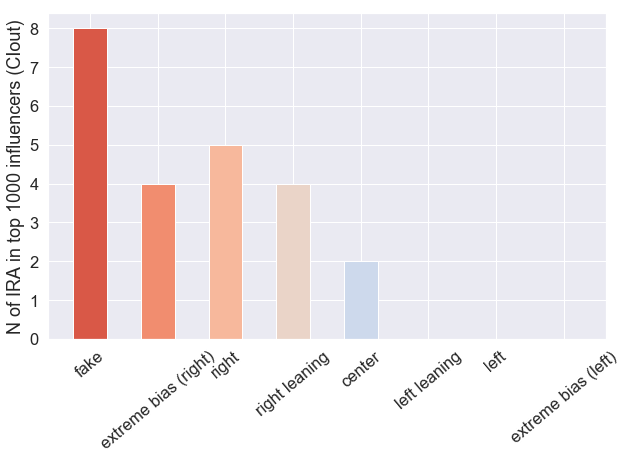

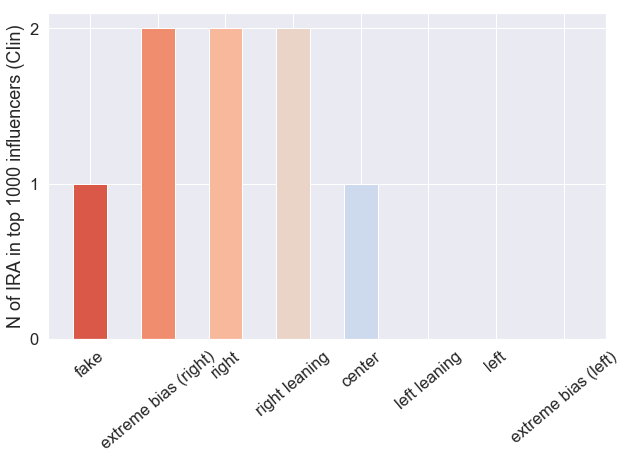

fake                    6.44615e+06
extreme bias (right)     1.9526e+06
right                    1.5514e+06
right leaning               1162.28
center                      69379.2
left leaning                83185.6
left                        6760.21
extreme bias (left)               0
Name: out_IRA, dtype: object
fake                      2.546e+06
extreme bias (right)     2.3082e+06
right                   1.60486e+06
right leaning               53773.1
center                  1.07622e+06
left leaning            2.08762e+06
left                         936409
extreme bias (left)          148775
Name: out_All users, dtype: object
fake out pvalue = 0.121
extreme bias (right) out pvalue = 0.192
right out pvalue = 0.584
right leaning out pvalue = 0.958
center out pvalue = 0.842
left leaning out pvalue = 0.554
left out pvalue = 1.000
extreme bias (left) out pvalue = 1.000


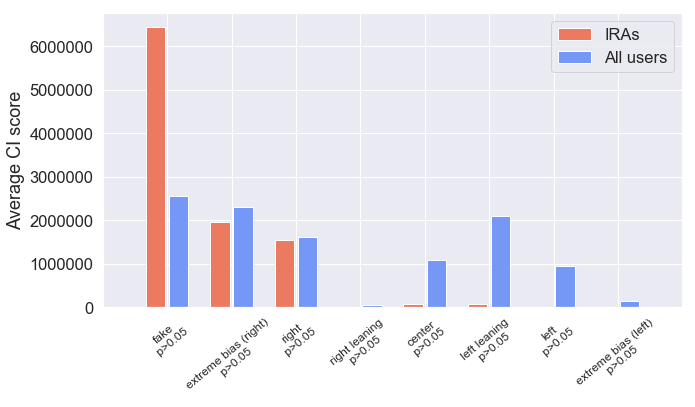

fake                     723818
extreme bias (right)     640112
right                    279391
right leaning           1485.09
center                    33297
left leaning              82404
left                    43388.6
extreme bias (left)     1300.54
Name: in_IRA, dtype: object
fake                     238478
extreme bias (right)     156133
right                   62630.2
right leaning           588.044
center                    12928
left leaning            60457.6
left                    70016.6
extreme bias (left)     22578.3
Name: in_All users, dtype: object
fake in pvalue = 0.006
extreme bias (right) in pvalue = 0.016
right in pvalue = 0.052
right leaning in pvalue = 0.011
center in pvalue = 0.000
left leaning in pvalue = 0.000
left in pvalue = 0.000
extreme bias (left) in pvalue = 0.618


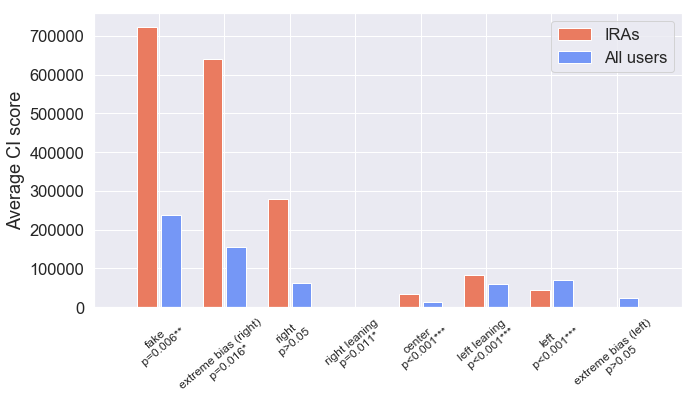

In [227]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

for label in tqdm(labels):
#     print(label, "...")
    rst = build_CI_rank("disk/network/{}_v2.gt".format(label))
#     for dire in ["out", "undir", "both", "in"]:
    for dire in ["out", "in"]:
#         print(label, dire, "...")
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]
        ira_rank = {}
        # top list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
            except:
                pass
            
#         print(f"---- IRA rank ---- {label} {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_10_users[f"{label}_{dire}"] = ira_rank[:10]
        
        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_sum = IRA_CI.sum()
        
        # 总体排名
#         print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
        for i, d in enumerate(rst[dire + "_id"]):
            if d[1] <= IRA_CI_sum:
                break
        dict_ira_rank[label + "_" + dire] = "{}/{}".format(i+1, len(user_CI))
                
        
#         IRA_CI_mean = IRA_CI.mean()
        IRA_CI_mean = IRA_CI.mean()
        all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
        all_CI_mean = all_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value
display(pd.Series(dict_ira_rank))


# 交集

def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(10, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, 
                  color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)

    if dire == "in":
        plt.yticks([0, 1, 2])
    plt.ylabel(f'N of IRA in top {top_num} influencers (CI{dire})'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}-v2.pdf".format(top_num, dire),
                  dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)

    
from scipy.stats import ks_2samp

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel("Average CI score")
    compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
                                     color=ira_c, label="IRAs")
    compare_CI_value[dire + "_All users"].plot.bar(width=0.3, position=-0.1, 
                                     color=all_c, label="All users")
    
    print(compare_CI_value[dire + "_IRA"])
    print(compare_CI_value[dire + "_All users"])
    
    # 显著性检验    
    _ticks = []
    for label in labels:
        d = dict_CI[label]
        pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])[1]
        print(label, dire, "pvalue = {:.3f}".format(pvalue))
        if pvalue < 0.001:
            _ticks.append(label + "\n p<0.001***")
        elif pvalue < 0.01:
            _ticks.append("{}\n p={:.3f}**".format(label, pvalue))
        elif pvalue < 0.05:
            _ticks.append("{}\n p={:.3f}*".format(label, pvalue))
        else:
            _ticks.append("{}\n p>0.05".format(label))
    
    plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
    plt.xlim(-1, len(labels))
    plt.legend()

    plt.tight_layout()
    plt.savefig("fig/CI_{}.pdf".format(dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [13]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

label = "fake_extre"
rst = build_CI_rank("disk/network/fake_extreme_v2.gt")
for dire in ["out", "in"]:
#         print(label, dire, "...")
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    ira_rank = {}
    # top list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    for user_id, row in IRA_users.iterrows():
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
        except:
            pass

    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[f"{label}_{dire}"] = ira_rank[:10]

    len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
    # print("参与人数：", len(IRA_CI), len(sort_user_CI))
    IRA_CI = pd.Series(IRA_CI)
    IRA_CI_sum = IRA_CI.sum()

    # 总体排名
    # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
    for i, d in enumerate(rst[dire + "_id"]):
        if d[1] <= IRA_CI_sum:
            break
    dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"


#         IRA_CI_mean = IRA_CI.mean()
    IRA_CI_mean = IRA_CI.mean()
    all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
    all_CI_mean = all_CI.mean()

    dict_CI[label][dire + "_IRA"] = IRA_CI_mean
    dict_CI[label][dire + "_All users"] = all_CI_mean
    dict_CI[label][dire + "_IRA dist"] = IRA_CI
    dict_CI[label][dire + "_All dist"] = all_CI

In [228]:
json.dump(top_10_users, open("data/top_10_ira.json", "w"))

0 10.126817885489466 1
0 7.5048897851411445 1
CI score
 category:fake
direction:out


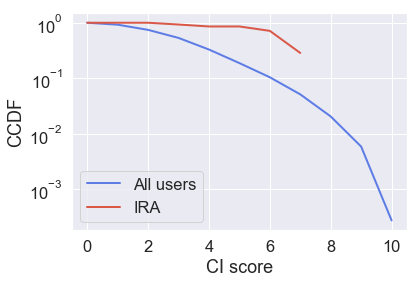

0 8.164498141654516 1
0 6.8090354169436464 1
CI score
 category:fake
direction:in


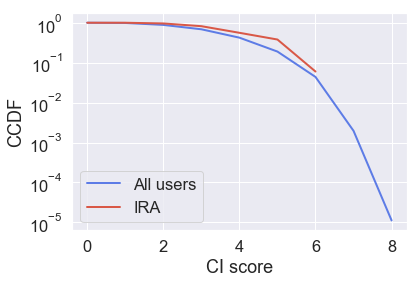

0 10.594088174107524 1
0 7.978304348559624 1
CI score
 category:extreme bias (right)
direction:out


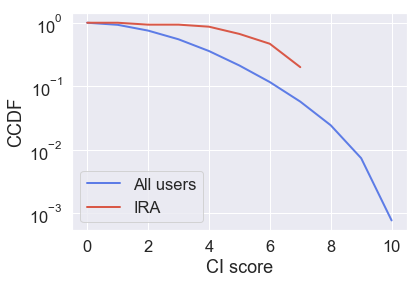

0 7.983906575912224 1
0 7.426365935456665 1
CI score
 category:extreme bias (right)
direction:in


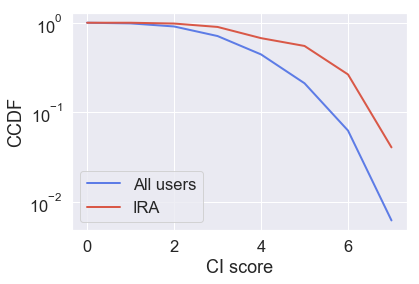

0 10.804296348274034 1
0 7.974927992149269 1
CI score
 category:right
direction:out


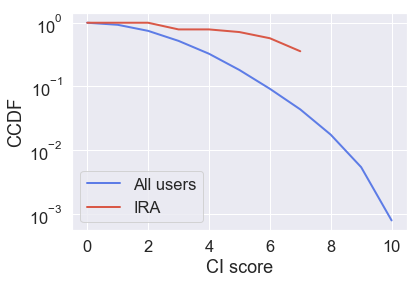

0 7.738134540706351 1
0 7.216350299683929 1
CI score
 category:right
direction:in


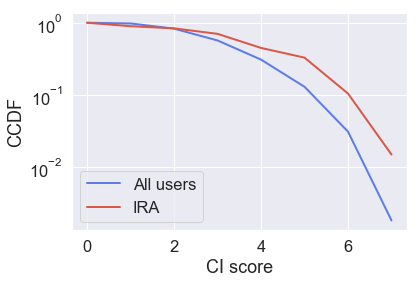

0 9.611782837843021 1
0 4.902677211134544 1
CI score
 category:right leaning
direction:out


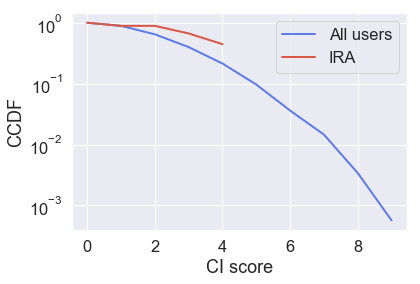

0 5.487811222633905 1
0 5.074293363890901 1
CI score
 category:right leaning
direction:in


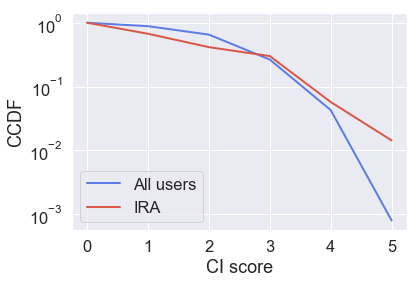

0 11.374527361082558 1
0 6.902351819413946 1
CI score
 category:center
direction:out


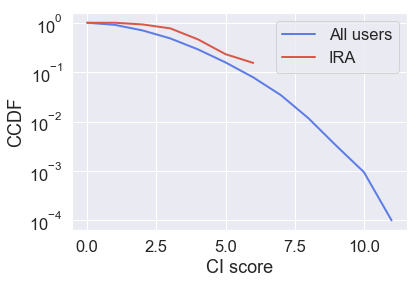

0 7.5890040436314115 1
0 6.45549627010525 1
CI score
 category:center
direction:in


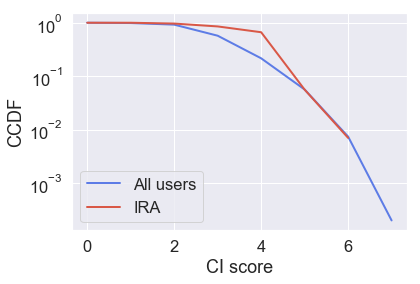

0 11.498302034047779 1
0 7.118847936136031 1
CI score
 category:left leaning
direction:out


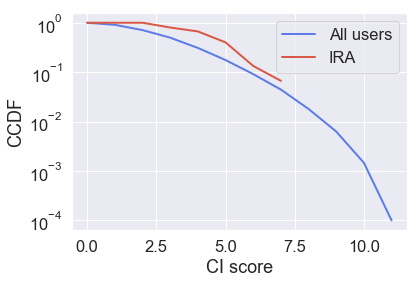

0 8.327496121160419 1
0 6.517028880270624 1
CI score
 category:left leaning
direction:in


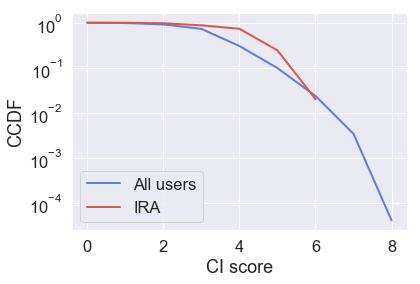

0 10.6681341661706 1
0 5.879676080952016 1
CI score
 category:left
direction:out


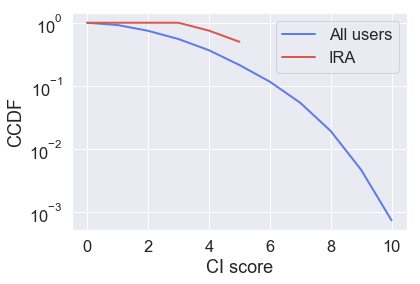

0 8.159407214678305 1
0 6.123979624691392 1
CI score
 category:left
direction:in


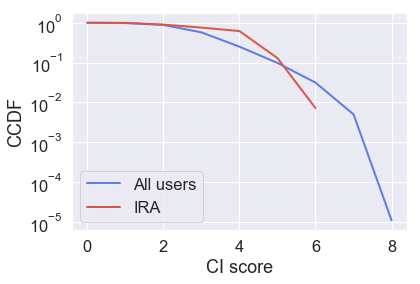

0 9.350606579293581 1
0 -inf 1


ValueError: Maximum allowed size exceeded

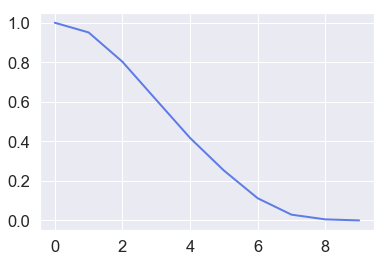

In [25]:
for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

# Who is collective influencers?

fake news最有影响力的用户

TOP 100 CIs!!

In [109]:
db_uid_name = {}
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    db_uid_name[w[0]] = {
        "name": w[1],
        "fol": w[2],
        "fri": w[3],
    }

In [111]:
g = gt.load_graph("disk/network/fake_nc.gt")
map_user_id = {i: g.vp.id[v] for i, v in enumerate(g.vertices())}

In [114]:
top_user_list = {}

# both
user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break

top_user_list["Top CI(both)"] = top_users

In [115]:
# out
user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break
        
top_user_list["Top CI(out)"] = top_users

In [8]:
d = pd.read_csv("data/CI_dyn.txt", dtype=str)
d = d.astype({"source": int, "CI_dynamics": int})

In [9]:
d["ave_CI_dyn"] = d["CI_dynamics"] / d["source"]

In [11]:
uids = d.sort_values("CI_dynamics", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    print(user_id, db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top CI dynamics"] = top_users

825501626 VivaLaAmes
18643437 PrisonPlanet
109065990 RealAlexJones
19211550 gatewaypundit
17980523 mitchellvii
4855687055 Lagartija_Nix
707278892801765377 TruthFeedNews
18856867 zerohedge
2242085304 RickRWells
14669951 DRUDGE_REPORT
4831603043 TPoliticmanager
3022045469 ThePatriot143
3914047581 Italians4Trump
14505245 infowars
25073877 realDonaldTrump
704034081898668032 Miami4Trump
1575689569 BigStick2013
39344374 DonaldJTrumpJr
4510755552 _Makada_
2728672957 KitDaniels1776
1564676498 surfermom77
19173608 JayS2629
3270559782 MONAKatOILS
567626521 jko417
122455671 TeaPartyOrg
2217181338 conserv_tribune
4717892303 V_of_Europe
1494835716 AIIAmericanGirI
27404671 SavageNation
358545917 Cernovich
4786763677 MOVEFORWARDHUGE
975217231 JrcheneyJohn
53297881 redflagnews
2845849081 ARnews1936
999453985 BlissTabitha
4165642155 ConstanceQueen8
4584443975 TRUMP_PREZ
72882689 SonofLiberty357
2417844248 _Proud_American
788571666 EjHirschberger
2164876369 RepStevenSmith
16589206 wikileaks
779739206339

In [181]:
uids = d.sort_values("ave_CI_dyn", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top average CI dynamics"] = top_users

In [182]:
d = pd.DataFrame(top_user_list)
d.index += 1
d.to_csv("data/top_users.csv")

## IRAs as supporters 

In [ ]:
from collections import Counter
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Making URL 

In [117]:
URL_counts = all_tweets.URL.value_counts()

In [32]:
# cnt = 0

set_URL = set()

for URL in URL_counts.index:
    # print(URL)
    if URL.endswith("/"):
        URL = URL[:-1]
    if URL in set_URL:
        print(URL)
    set_URL.add(URL)
        
print(len(set_URL))

NameError: name 'URL_counts' is not defined

In [125]:
len(URL_counts)

2524061

## 网络分析

分析每种媒体网络中IRA的节点数量，相关边的数量，平均度，最大度等。

In [36]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    # print(out_d)
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = out_d.max()

    in_d = pd.Series([k[1] for k in G.in_degree()])
    # print(in_d)
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = in_d.max()

    return {
        "N nodes": int(n_nodes),
        "N edges": int(n_edges),
        "<k>": k,
        "std(k_out) / <k>": std_out_d,
        "std(k_in) / <k>": std_in_d,
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }        


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    
    cover_set = set()
    for n in nodes:
        for _n in G[n]:
#             if putin.fuck(_n):
#                 continue
            cover_set.add(_n)
            
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = out_d.max()

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = in_d.max()
    
    return {
        "N nodes": int(n_nodes),
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "N cover": len(cover_set),
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }


In [130]:
networks_char = {}

for category in labels:
    rst = get_G_char("disk/network/{}_v2.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake_v2.gpickle ...
disk/network/extreme bias (right)_v2.gpickle ...
disk/network/right_v2.gpickle ...
disk/network/right leaning_v2.gpickle ...
disk/network/center_v2.gpickle ...
disk/network/left leaning_v2.gpickle ...
disk/network/left_v2.gpickle ...
disk/network/extreme bias (left)_v2.gpickle ...


In [131]:
networks_char = pd.DataFrame(networks_char).round(2).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "N edges": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_all_network.csv", float_format="%.1f")
networks_char

,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
fake,243728,1890385,7.76,28.32,2.86,46394,1234
extreme bias (right),267483,1901758,7.11,37.89,2.78,60622,642
right,381293,2129176,5.58,48.04,2.77,87229,546
right leaning,254265,631385,2.48,50.04,1.82,38994,147
center,974603,2957275,3.03,122.75,2.79,257580,550
left leaning,1182127,4279387,3.62,73.99,3.50,172056,913
left,586271,2074738,3.54,50.36,3.59,59759,795
extreme bias (left),83660,299381,3.58,33.83,2.52,23210,659


In [37]:
networks_char = {}

for category in labels:
    rst = get_G_char_IRA("disk/network/{}_v2.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake_v2.gpickle ...
disk/network/extreme bias (right)_v2.gpickle ...
disk/network/right_v2.gpickle ...
disk/network/right leaning_v2.gpickle ...
disk/network/center_v2.gpickle ...
disk/network/left leaning_v2.gpickle ...
disk/network/left_v2.gpickle ...
disk/network/extreme bias (left)_v2.gpickle ...


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [38]:
networks_char = pd.DataFrame(networks_char).round(2).transpose()
networks_char = networks_char[["N nodes", "N cover", "<k_out>", "<k_in>", "std(k_out) / <k_out>", "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_IRA_network.csv", float_format="%.1f")
networks_char

,N nodes,N cover,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
fake,116,3042.0,28.47,13.40,4.16,2.41,918,266
extreme bias (right),117,1925.0,17.48,14.08,4.24,2.41,563,248
right,150,2699.0,19.17,10.81,5.32,2.62,864,235
right leaning,164,424.0,2.62,3.72,5.13,1.85,107,68
center,226,971.0,4.35,7.80,6.75,1.45,310,127
left leaning,223,1320.0,6.03,9.46,5.04,1.34,270,136
left,186,450.0,2.46,7.59,6.75,1.01,154,57
extreme bias (left),37,0.0,0.00,1.92,NaN,0.91,0,8


## 分析IRA的outlets

In [3]:
all_tweets.head()

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
0,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:49:57,newsweek.com,0,1,1,5,0,785628468746727424,215207998
1,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:09,newsweek.com,0,0,0,5,785628468746727424,785628515991302144,20634939
2,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:10,newsweek.com,0,0,0,5,785628468746727424,785628519703326722,26378513
3,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:16,newsweek.com,0,0,0,5,785628468746727424,785628546114859008,445966346
4,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:23,newsweek.com,0,0,0,5,785628468746727424,785628574388621312,754104364164345860


In [13]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    print("\n======== {} ========".format(lab))
    _tweets = ira_tweets[ira_tweets.media_type==str(i)]
    print(_tweets["hostname"].value_counts())


======== fake ========
truthfeed.com              528
thegatewaypundit.com       129
therightscoop.com          113
conservativetribune.com    102
infowars.com                55
rickwells.us                42
zerohedge.com               29
therealstrategy.com         27
thepoliticalinsider.com     27
departed.co                 26
thefederalistpapers.org     25
thetruthdivision.com        18
clashdaily.com              16
usapoliticsnow.com          15
redflagnews.com             14
teaparty.org                 9
thehill.com                  1
Name: hostname, dtype: int64

======== extreme bias (right) ========
dailycaller.com          543
breitbart.com            356
freebeacon.com           141
americanthinker.com       92
newsninja2012.com         77
pjmedia.com               69
truepundit.com            62
100percentfedup.com       37
endingthefed.com          32
wnd.com                   19
westernjournalism.com     19
hannity.com               18
ilovemyfreedom.org        17
new

In [9]:
from urllib.parse import urlparse
from tqdm import tqdm_notebook as tqdm

cnt = 0
for i, tweet in tqdm(all_tweets.iterrows()):
    if urlparse(tweet["URL"]) != tweet["hostname"]:
        cnt += 1
        print(urlparse(tweet["URL"]).hostname, tweet["hostname"])
        if cnt > 100:
            break
        
print(cnt)

www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newswe

In [17]:
all_tweets[all_tweets.tweet_id=="775062649822253056"]

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
10423703,http://www.thegatewaypundit.com/2016/09/breaki...,2016-09-11 15:05:10,thegatewaypundit.com,0,0,1,0,0,775062649822253056,4826510725


In [ ]:
hostname = urlparse(url).hostname